In [1]:
import tensorflow as tf
from tensorflow import keras
%pylab inline
import pandas as pd

Populating the interactive namespace from numpy and matplotlib


In [2]:
#Fashion Mnist data set is avaliable into keras
fashion_mnist = keras.datasets.fashion_mnist

In [3]:
#Lets load the data and split into train and test
(x_train,y_train), (x_test, y_test)=fashion_mnist.load_data()

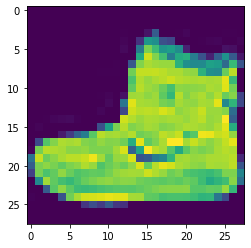

In [4]:
#lets plot the image and we can see what image is available and you can put digit into [] to see what image is available
plt.imshow(x_train[0])

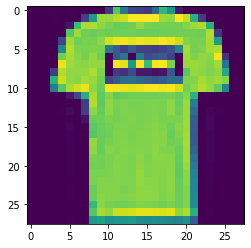

In [5]:
#lets see the image [1] what is image available
plt.imshow(x_train[1])

In [6]:
y_train[1]

0

In [7]:
#lets create the label available in data set and create a class
class_label=['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandel','Shirt','Sneaker','Bag','Ankle boot']

In [8]:
# Now you can see which items is  present at [1] and the above image is also showing the same

class_label[y_train[1]]

'T-shirt/top'

In [9]:
#now you can see that image pixel 28*28 is now converting into value, 1st pixal is black and 1st value is 0 
#and where the colour are present it has some value till 28 * 28 (rows/coloum). using the value ww will predict the image 

x_train[1]

array([[  0,   0,   0,   0,   0,   1,   0,   0,   0,   0,  41, 188, 103,
         54,  48,  43,  87, 168, 133,  16,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   1,   0,   0,   0,  49, 136, 219, 216, 228, 236,
        255, 255, 255, 255, 217, 215, 254, 231, 160,  45,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,  14, 176, 222, 224, 212, 203, 198, 196,
        200, 215, 204, 202, 201, 201, 201, 209, 218, 224, 164,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0, 188, 219, 200, 198, 202, 198, 199, 199,
        201, 196, 198, 198, 200, 200, 200, 200, 201, 200, 225,  41,   0,
          0,   0],
       [  0,   0,   0,   0,  51, 219, 199, 203, 203, 212, 238, 248, 250,
        245, 249, 246, 247, 252, 248, 235, 207, 203, 203, 222, 140,   0,
          0,   0],
       [  0,   0,   0,   0, 116, 226, 206, 204, 207, 204, 101,  75,  47,
         73,  48,  50,  45,  51,  63, 113, 222, 202, 206, 220, 224,   0,
          0,   0],
       [  

Let normanization of data . X is in form of 2D array in 28*28 pixal . Intisity of pixca; lies in b/w 0 and 255,
So we will be doing normilization of data by dividing the x train/ x test by 255. so that it get converted itno 0 and 1
as you can see that we have divided the by 255 because we know the intensity of scale and we want the number to be get converted b/w 0 and 1 and it need to be in form of float so we have used 255. other wise it will convert number into int from 
Generally normilization is x-mean/std when we don't know the scale

There are two ways to get the value into same scale

1) normiization (min-max scaling) values are shifted and rescaled so that they end up ranging from 0 and 1 (x-mean/max-min)

2) standardization is diffrent (x-mean/std.) neural network often expect an input value ranging from 0 and 1 and it is much less effected by outliear

In [10]:
x_train_n=x_train/255.
x_test_n=x_test/255.

In [11]:
x_train_n

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       ...,

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0.

In [12]:
x_test_n

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       ...,

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0.

# Spliting the data into Train/validation/test
        Training dataset is 60,000, test data set is 10,000. now we further divide the tarning data into train/validation,
        now we can see how this is help to run the Deeplearning
        
        Training Data- It help to training the model
        
        Validation-It is used to tuning the hyperparameter and evaluate the model. Generally we train the model and send it
                    to test , but with validation it create a diffrent fold of data with in tarining data set , so when you
                    tarin the model you also validated the data and pre check the performance of training data and then 
                    it moves to test
                    
         Test data - Now we check the accuracy/performance of model when you have already train/validation you model.
        

In [13]:
x_valid, x_train=x_train_n[:5000],x_train_n[5000:]
y_valid, y_train= y_train[:5000],y_train[5000:]
x_test=x_test_n

In [14]:
# Now you can see that data is normalized and it is b/w 0 and 1

x_valid[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

# Now we will use keras to create our model.
#There are 2 API for defining a model in keras

1) Sequential model API

2) Functional API

In [15]:
model=keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28*28]))
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))

In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [17]:
weights, biases = model.layers[1].get_weights()
#weights, biases = model.layers[2].get_weights()

In [18]:
# This weights are randomly assigned for initalization 

weights

#weights[3]

array([[ 0.01893789,  0.0612748 , -0.04159958, ...,  0.01010421,
         0.02480866, -0.04253486],
       [ 0.03110512, -0.05730286, -0.00525548, ..., -0.01412059,
         0.00635957,  0.0123319 ],
       [ 0.07229958,  0.02210183, -0.01708632, ..., -0.03099427,
         0.0659361 , -0.05757141],
       ...,
       [-0.03927468,  0.0523413 , -0.01627922, ..., -0.05470792,
         0.06749977, -0.0054444 ],
       [-0.06355235,  0.06271222, -0.03626141, ..., -0.03612371,
        -0.0295306 ,  0.04212813],
       [ 0.05519761,  0.04129554, -0.02023602, ...,  0.06554556,
         0.03646836,  0.06129363]], dtype=float32)

In [19]:
weights.shape

(784, 300)

In [20]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [21]:
biases.shape

(300,)

# Settingup learning process method and for that we are using compile method

1) sparse_categorical_crossentropy is used because our y is available in form of classification/labels (in our data we have 10 diffrent categorical data). If labels are in form of binary (yes/no, true/false) then we will use binary_crossentrophy

2)Stochastic gradient Descent (sgd) helps in single training records, forward and backward propagation

3)Accuracy helps you to check the performance of your model

In [22]:
model.compile(loss="sparse_categorical_crossentropy",
             optimizer="sgd",
             metrics="accuracy")

we have complie our model and now we can fit our model. epochs is one cycle through the full training data and to recheck the performance on the same data. During the each epochs(30) we are getting loss, accuracy, val_loss, and val_accuracy.

In [23]:
model_1=model.fit(x_train, y_train, epochs=30,
         validation_data=(x_valid,y_valid))

Epoch 1/30
1719/1719 [==============================] - 9s 5ms/step - loss: 0.7116 - accuracy: 0.7676 - val_loss: 0.5099 - val_accuracy: 0.8266
Epoch 2/30
1719/1719 [==============================] - 9s 5ms/step - loss: 0.4876 - accuracy: 0.8301 - val_loss: 0.4480 - val_accuracy: 0.8478
Epoch 3/30
1719/1719 [==============================] - 10s 6ms/step - loss: 0.4427 - accuracy: 0.8445 - val_loss: 0.4135 - val_accuracy: 0.8624
Epoch 4/30
1719/1719 [==============================] - 8s 5ms/step - loss: 0.4146 - accuracy: 0.8545 - val_loss: 0.4206 - val_accuracy: 0.8574
Epoch 5/30
1719/1719 [==============================] - 9s 5ms/step - loss: 0.3951 - accuracy: 0.8608 - val_loss: 0.3866 - val_accuracy: 0.8692
Epoch 6/30
1719/1719 [==============================] - 8s 5ms/step - loss: 0.3803 - accuracy: 0.8670 - val_loss: 0.3883 - val_accuracy: 0.8660
Epoch 7/30
1719/1719 [==============================] - 8s 5ms/step - loss: 0.3658 - accuracy: 0.8712 - val_loss: 0.3774 - val_accuracy

In [24]:
model_1.params

{'verbose': 1, 'epochs': 30, 'steps': 1719}

In [25]:
#with .history you can see the 30 Epoch (loss, accuracy,val_accuracy )
model_1.history

{'loss': [0.7115773558616638,
  0.48757773637771606,
  0.44271835684776306,
  0.41457322239875793,
  0.39505112171173096,
  0.38029447197914124,
  0.3658220171928406,
  0.35509347915649414,
  0.3449169397354126,
  0.3351087272167206,
  0.32704558968544006,
  0.3190833032131195,
  0.3126363754272461,
  0.30429214239120483,
  0.2981753647327423,
  0.2926166355609894,
  0.2851425111293793,
  0.2806096374988556,
  0.2746577262878418,
  0.26978710293769836,
  0.2645728588104248,
  0.25976935029029846,
  0.25587332248687744,
  0.25076234340667725,
  0.2464846819639206,
  0.24213629961013794,
  0.23698660731315613,
  0.23345166444778442,
  0.23092105984687805,
  0.22716039419174194],
 'accuracy': [0.7676181793212891,
  0.8301091194152832,
  0.8444545269012451,
  0.8545272946357727,
  0.8607636094093323,
  0.8669636249542236,
  0.8711636066436768,
  0.8740727305412292,
  0.8783272504806519,
  0.8804908990859985,
  0.8822908997535706,
  0.8864545226097107,
  0.8893818259239197,
  0.890290915966

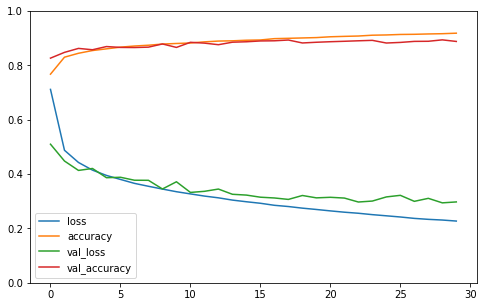

In [26]:
pd.DataFrame(model_1.history).plot(figsize=(8,5))
plt.grid=True
plt.gca().set_ylim(0,1)
plt.show()


With the above graph we can see that Training accuracy is still increasing and with that valid accuracy is also increasing and other hand Training loss is dcereasing and valid Loss is also decreasing . It means you can run more epoch to increase the accuarcy and minimum loss

In [27]:
#lets check the accuaracy/performance of model we will use evaluate method
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.3380 - accuracy: 0.8788


[0.3380259573459625, 0.8787999749183655]

In [28]:
x_new=x_test[:3]

In [29]:
x_new.shape

(3, 28, 28)

In [30]:
y_prob=model.predict(x_new)

In [31]:
y_prob.round(2)

array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.01, 0.  , 0.02, 0.  , 0.97],
       [0.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]],
      dtype=float32)

In [32]:
y_prob.shape

(3, 10)

In [33]:
y_pred=model.predict_classes(x_new)
y_pred

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


array([9, 2, 1], dtype=int64)

In [34]:
np.array(class_label)[y_pred]

array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')

As you can see that Y-pred has predicted items and we can see the name of item which is there (9,2,1) with np.array. lets plot the diagram to what classes is having.

AxesImage(54,36;334.8x217.44)


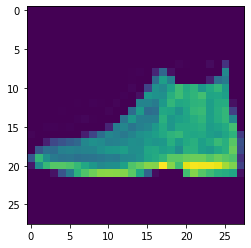

In [35]:
print(plt.imshow(x_test[0]))

AxesImage(54,36;334.8x217.44)


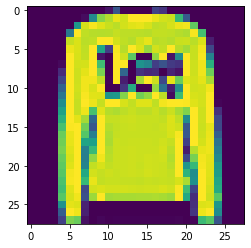

In [36]:
print(plt.imshow(x_test[1]))

AxesImage(54,36;334.8x217.44)


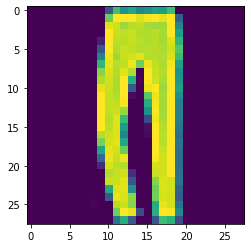

In [37]:
print(plt.imshow(x_test[2]))